# Problem Statement

"Bagaimana distribusi dan tren perilaku pelanggan berdasarkan segmentasi RFM, dan segmen mana yang memberikan kontribusi terbesar terhadap pendapatan perusahaan?"

"Bagaimana tren penjualan dan retensi pelanggan dari waktu ke waktu, serta strategi apa yang dapat diterapkan untuk meningkatkan loyalitas dan mengurangi Lost Customer?"

# Data Understanding

In [1]:
# ===============================
# 1. Import Library
# ===============================
import pandas as pd
import numpy as np

# ===============================
# 2. Load Dataset
# ===============================
# Pastikan kamu sudah upload file CSV ke Google Colab atau mount Google Drive
clientes = pd.read_csv('Clientes.csv')
vendas = pd.read_csv('Vendas.csv')
produtos = pd.read_csv('Produtos.csv')

# ===============================
# 3. Cek Data Awal
# ===============================
print("Clientes:", clientes.shape)
print("Vendas:", vendas.shape)
print("Produtos:", produtos.shape)

Clientes: (1000, 8)
Vendas: (20000, 9)
Produtos: (1000, 9)


In [2]:
clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Cliente_ID        1000 non-null   int64  
 1   Nome              1000 non-null   object 
 2   Idade             1000 non-null   int64  
 3   Género            1000 non-null   object 
 4   Cidade            1000 non-null   object 
 5   Canal de Compra   1000 non-null   object 
 6   Total de Compras  1000 non-null   float64
 7   Imagem            1000 non-null   object 
dtypes: float64(1), int64(2), object(5)
memory usage: 62.6+ KB


In [3]:
vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Venda_ID        20000 non-null  int64  
 1   Loja_ID         20000 non-null  int64  
 2   Produto_ID      20000 non-null  int64  
 3   Cliente_ID      20000 non-null  int64  
 4   Colaborador_ID  20000 non-null  int64  
 5   Quantidade      20000 non-null  int64  
 6   Preço Unitário  20000 non-null  float64
 7   Data da Venda   20000 non-null  object 
 8   Canal de Venda  20000 non-null  object 
dtypes: float64(1), int64(6), object(2)
memory usage: 1.4+ MB


In [4]:
produtos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Produto_ID       1000 non-null   int64  
 1   Nome             1000 non-null   object 
 2   Categoria        1000 non-null   object 
 3   Cor              1000 non-null   object 
 4   Descrição        1000 non-null   object 
 5   Tamanho          1000 non-null   object 
 6   Preço            1000 non-null   float64
 7   Custo_Aquisição  1000 non-null   float64
 8   Imagem           1000 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 70.4+ KB


In [5]:
clientes.rename(columns={
    "Cliente_ID": "Customer_ID",
    "Nome": "Customer_Name",
    "Idade": "Age",
    "Género": "Gender",
    "Cidade": "City",
    "Canal de Compra": "Purchase_Channel",
    "Total de Compras": "Total_Purchases",
    "Imagem": "Image_URL"
}, inplace=True)

In [6]:
vendas.rename(columns={
    "Venda_ID": "Sale_ID",
    "Loja_ID": "Store_ID",
    "Produto_ID": "Product_ID",
    "Cliente_ID": "Customer_ID",
    "Colaborador_ID": "Staff_ID",
    "Quantidade": "Quantity",
    "Preço Unitário": "Unit_Price",
    "Data da Venda": "Sale_Date",
    "Canal de Venda": "Sales_Channel"
}, inplace=True)

# Convert Sale_Date ke datetime
vendas["Sale_Date"] = pd.to_datetime(vendas["Sale_Date"], format="%Y-%m-%d %H:%M:%S")

In [7]:
produtos.rename(columns={
    "Produto_ID": "Product_ID",
    "Nome": "Product_Name",
    "Categoria": "Category",
    "Cor": "Color",
    "Descrição": "Description",
    "Tamanho": "Size",
    "Preço": "Price",
    "Custo_Aquisição": "Acquisition_Cost",
    "Imagem": "Image_URL"
}, inplace=True)


In [8]:
# ===============================
# 5. Merge Dataset
# ===============================

# Merge sales + customers
sales_customers = vendas.merge(clientes, on="Customer_ID", how="left")

# Merge dengan products
merged_data = sales_customers.merge(produtos, on="Product_ID", how="left")

# ===============================
# 6. Output hasil
# ===============================
print("Merged Data Shape:", merged_data.shape)
merged_data.head()

Merged Data Shape: (20000, 24)


,Sale_ID,Store_ID,Product_ID,Customer_ID,Staff_ID,Quantity,Unit_Price,Sale_Date,Sales_Channel,Customer_Name,...,Total_Purchases,Image_URL_x,Product_Name,Category,Color,Description,Size,Price,Acquisition_Cost,Image_URL_y
0,1,1,259,41,499,30,175.88,2020-04-19 13:51:40,Online,Lourenço Branco,...,442.24,https://randomuser.me/api/portraits/men/21.jpg,Harum,Roupas,Vermelho,Assumenda aut dolor ab saepe non repellat.,S,53.82,34.55,https://source.unsplash.com/200x200/?roupas
1,2,1,898,308,207,90,83.19,2016-05-16 04:52:08,Física,Frederico Loureiro,...,335.60,https://randomuser.me/api/portraits/men/53.jpg,Eius,Calçado,Rosa,Excepturi quae esse magnam accusantium esse ar...,37,54.14,13.43,https://source.unsplash.com/200x200/?calçado
2,3,3,357,910,477,88,682.42,2018-11-30 17:45:41,Online,Ema Leal-Mota,...,577.83,https://randomuser.me/api/portraits/men/98.jpg,Quasi,Roupas,Laranja,Nam inventore reprehenderit magnam ab.,XS,75.15,43.01,https://source.unsplash.com/200x200/?roupas
3,4,1,490,914,354,63,365.50,2024-12-31 15:53:01,Online,Gaspar Neto,...,496.27,https://randomuser.me/api/portraits/women/78.jpg,Voluptatibus,Roupas,Branco,Quia dolorem illum occaecati veritatis possimus.,XL,30.51,29.78,https://source.unsplash.com/200x200/?roupas
4,5,4,341,92,384,47,182.52,2019-03-21 17:00:00,Física,Débora Silva,...,222.93,https://randomuser.me/api/portraits/men/90.jpg,Suscipit,Roupas,Vermelho,Nobis adipisci non.,XXL,84.84,26.49,https://source.unsplash.com/200x200/?roupas


# Data Preprocessing

In [9]:
# Cek Missing Value
merged_data.isnull().sum()

,0
Sale_ID,0
Store_ID,0
Product_ID,0
Customer_ID,0
Staff_ID,0
Quantity,0
Unit_Price,0
Sale_Date,0
Sales_Channel,0
Customer_Name,0


In [10]:
# Cek Duplikat pada Data
merged_data.duplicated().sum()

np.int64(0)

In [11]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Sale_ID           20000 non-null  int64         
 1   Store_ID          20000 non-null  int64         
 2   Product_ID        20000 non-null  int64         
 3   Customer_ID       20000 non-null  int64         
 4   Staff_ID          20000 non-null  int64         
 5   Quantity          20000 non-null  int64         
 6   Unit_Price        20000 non-null  float64       
 7   Sale_Date         20000 non-null  datetime64[ns]
 8   Sales_Channel     20000 non-null  object        
 9   Customer_Name     20000 non-null  object        
 10  Age               20000 non-null  int64         
 11  Gender            20000 non-null  object        
 12  City              20000 non-null  object        
 13  Purchase_Channel  20000 non-null  object        
 14  Total_Purchases   2000

# Feature Engineering

In [12]:
from datetime import timedelta

# Pastikan kolom Sale_Date dalam format datetime
merged_data["Sale_Date"] = pd.to_datetime(merged_data["Sale_Date"])

# Tentukan tanggal referensi (misal, sehari setelah transaksi terakhir)
reference_date = merged_data["Sale_Date"].max() + timedelta(days=1)

# Hitung Recency (hari sejak transaksi terakhir)
rfm_recency = merged_data.groupby("Customer_ID")["Sale_Date"].max().apply(lambda x: (reference_date - x).days)

# Hitung Frequency (jumlah transaksi)
rfm_frequency = merged_data.groupby("Customer_ID")["Sale_ID"].nunique()

# Hitung Monetary (total nilai pembelian)
rfm_monetary = (merged_data["Unit_Price"] * merged_data["Quantity"]).groupby(merged_data["Customer_ID"]).sum()

# Gabungkan ke DataFrame RFM
rfm_df = pd.DataFrame({
    "Recency": rfm_recency,
    "Frequency": rfm_frequency,
    "Monetary": rfm_monetary
}).reset_index()

# Merge kembali ke merged_data
merged_data = merged_data.merge(rfm_df, on="Customer_ID", how="left")

# Cek Outlier dari Data

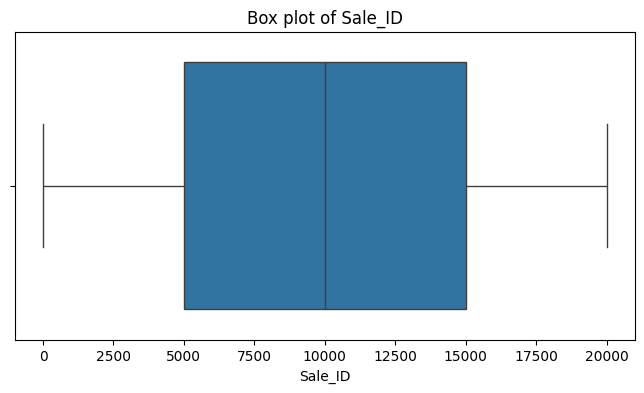

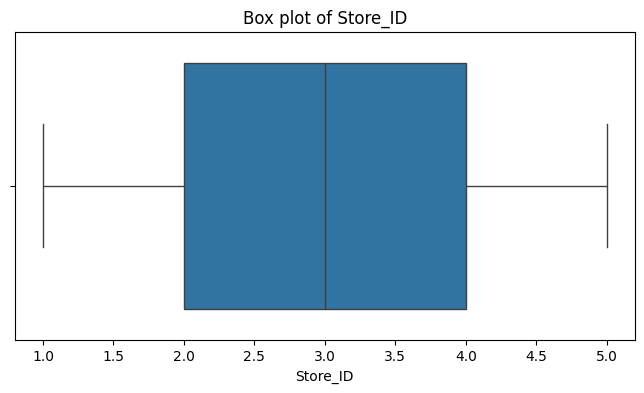

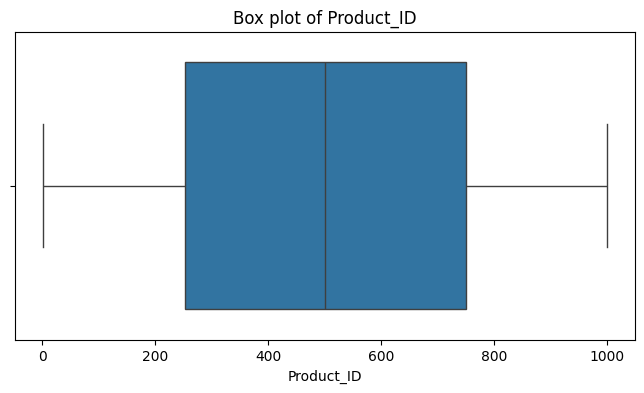

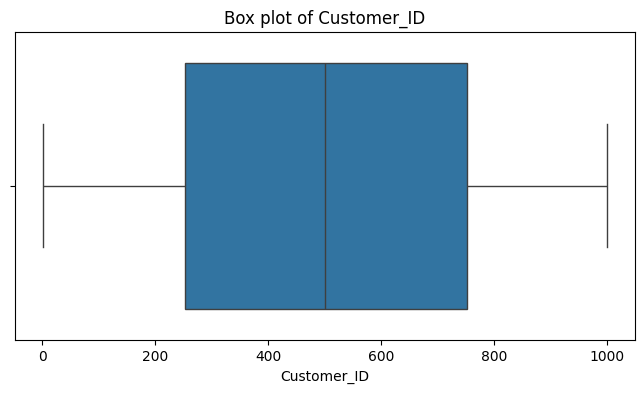

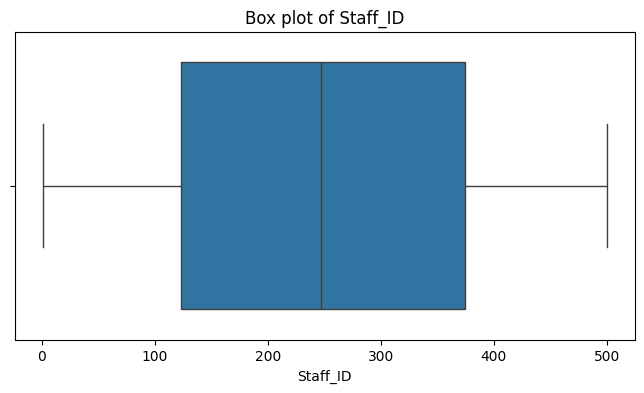

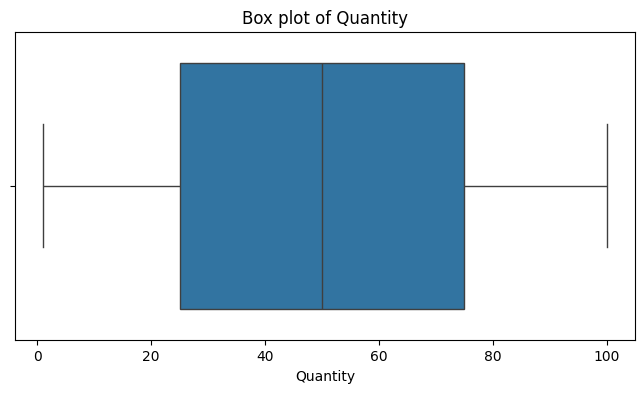

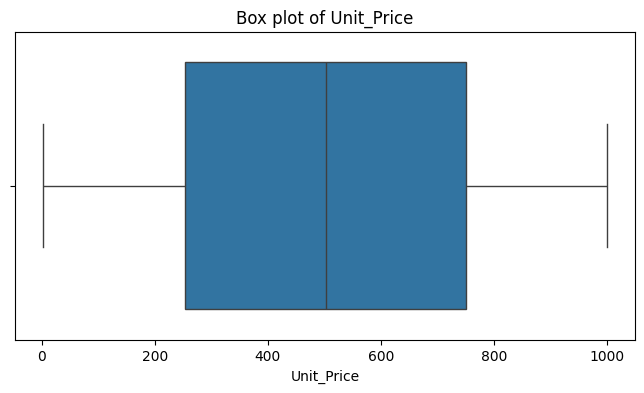

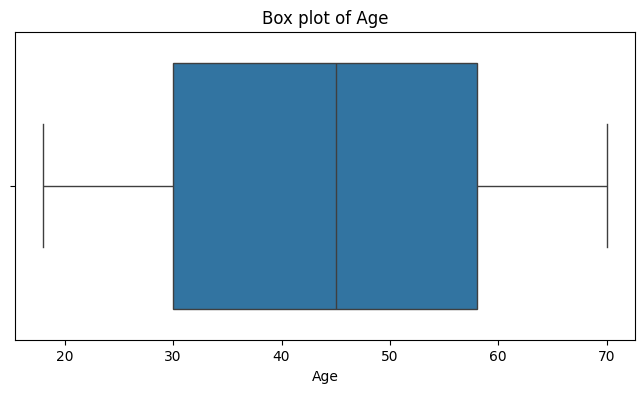

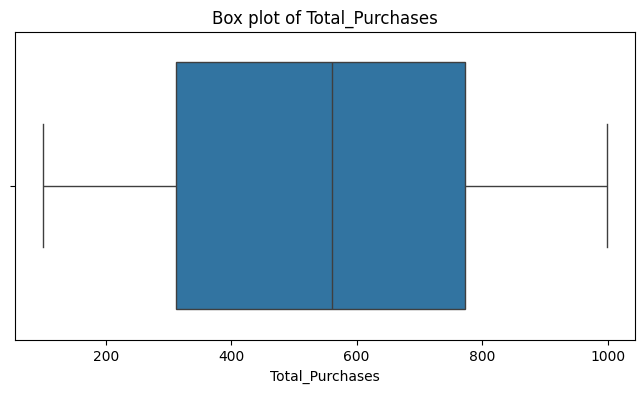

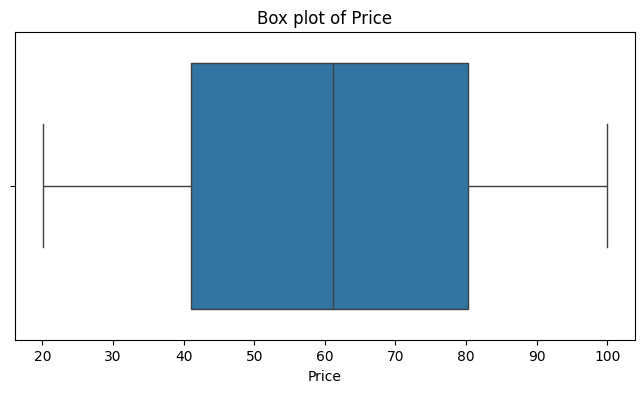

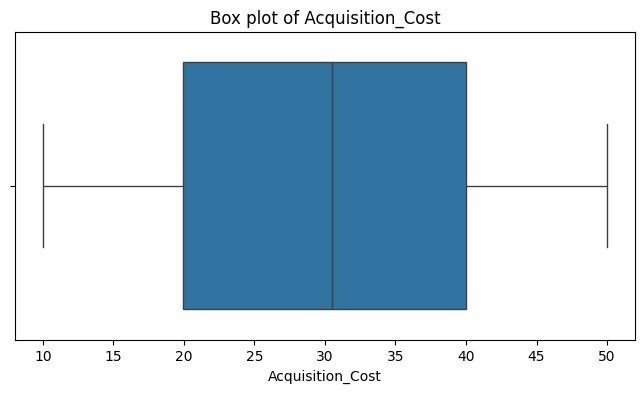

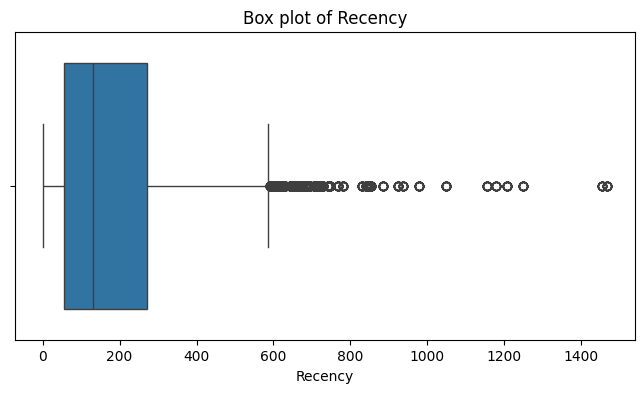

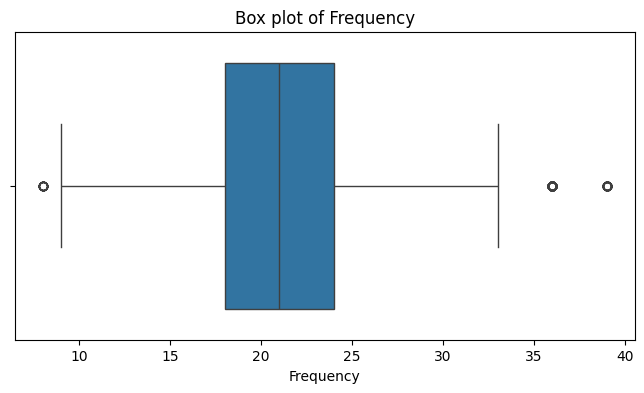

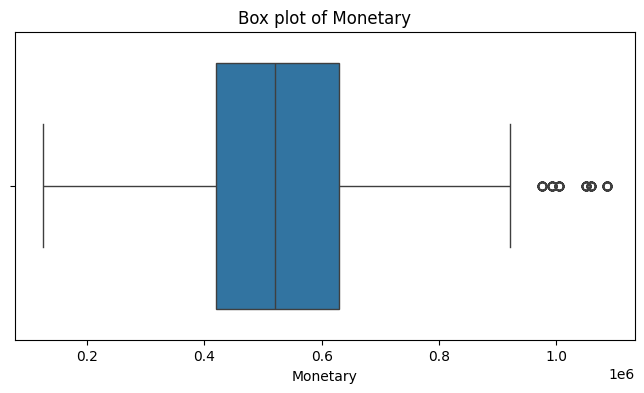

In [13]:
# cek outlier dari data
import seaborn as sns

# Function to detect outliers using IQR
def detect_outliers_iqr(df, column):
    q1 = merged_data[column].quantile(0.25)
    q3 = merged_data[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = merged_data[(merged_data[column] < lower_bound) | (merged_data[column] > upper_bound)]
    return outliers

# Example usage for numerical columns
numerical_cols = merged_data.select_dtypes(include=np.number).columns

import matplotlib.pyplot as plt
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=merged_data[col])
    plt.title(f'Box plot of {col}')
    plt.show()

In [14]:
# d. Top Products by Quantity and Sales Value
top_products_quantity = merged_data.groupby("Product_Name")["Quantity"].sum().sort_values(ascending=False).head(5)
top_products_sales = (merged_data["Unit_Price"] * merged_data["Quantity"]).groupby(merged_data["Product_Name"]).sum().sort_values(ascending=False).head(5)
print("\nTop 5 Products by Quantity:\n", top_products_quantity)
print("\nTop 5 Products by Sales Value:\n", top_products_sales)

# e. Monthly Sales and Customer Trends
merged_data["YearMonth"] = merged_data["Sale_Date"].dt.to_period("M")
monthly_sales = (merged_data["Unit_Price"] * merged_data["Quantity"]).groupby(merged_data["YearMonth"]).sum()
monthly_customers = merged_data.groupby("YearMonth")["Customer_ID"].nunique()
print("\nMonthly Sales Trend:\n", monthly_sales)
print("\nMonthly Unique Customers Trend:\n", monthly_customers)


Top 5 Products by Quantity:
 Product_Name
Modi        15706
Hic         13730
Adipisci    12942
Id          11053
Enim         9833
Name: Quantity, dtype: int64

Top 5 Products by Sales Value:
 Product_Name
Modi        8026630.06
Adipisci    6825934.25
Hic         6250598.60
Id          5806600.05
Enim        5083655.85
dtype: float64

Monthly Sales Trend:
 YearMonth
2014-01    4388171.63
2014-02    3123197.52
2014-03    3357905.08
2014-04    3575361.27
2014-05    3669454.99
              ...    
2024-08    3913462.12
2024-09    3991559.83
2024-10    3551608.18
2024-11    3905827.00
2024-12    4098965.24
Freq: M, Length: 132, dtype: float64

Monthly Unique Customers Trend:
 YearMonth
2014-01    142
2014-02    129
2014-03    127
2014-04    136
2014-05    134
          ... 
2024-08    144
2024-09    157
2024-10    135
2024-11    140
2024-12    142
Freq: M, Name: Customer_ID, Length: 132, dtype: int64


In [15]:
# Daftar nama produk yang dianggap anomali
anomali_produk = ["Error", "Test", "Unknown", "N/A", ""]

# Simpan jumlah data sebelum pembersihan
before_clean = len(merged_data)

# Filter: hapus baris dengan Product_Name anomali atau nilai kosong
merged_data = merged_data[~merged_data["Product_Name"].isin(anomali_produk)]

# Hapus baris dengan Product_Name null
merged_data = merged_data[merged_data["Product_Name"].notnull()]

# Simpan jumlah data setelah pembersihan
after_clean = len(merged_data)

print(f"Data sebelum pembersihan: {before_clean}")
print(f"Data setelah pembersihan: {after_clean}")
print(f"Jumlah data yang dihapus: {before_clean - after_clean}")


Data sebelum pembersihan: 20000
Data setelah pembersihan: 19833
Jumlah data yang dihapus: 167


In [16]:
# Cek tipe fitur
cat_cols = merged_data.select_dtypes('object').columns.tolist()
num_cols = merged_data.select_dtypes(include=['int64', 'float64']).columns.tolist()
print("Fitur kategorikal:", cat_cols)
print("Fitur numerik:", num_cols)

Fitur kategorikal: ['Sales_Channel', 'Customer_Name', 'Gender', 'City', 'Purchase_Channel', 'Image_URL_x', 'Product_Name', 'Category', 'Color', 'Description', 'Size', 'Image_URL_y']
Fitur numerik: ['Sale_ID', 'Store_ID', 'Product_ID', 'Customer_ID', 'Staff_ID', 'Quantity', 'Unit_Price', 'Age', 'Total_Purchases', 'Price', 'Acquisition_Cost', 'Recency', 'Frequency', 'Monetary']


# EDA

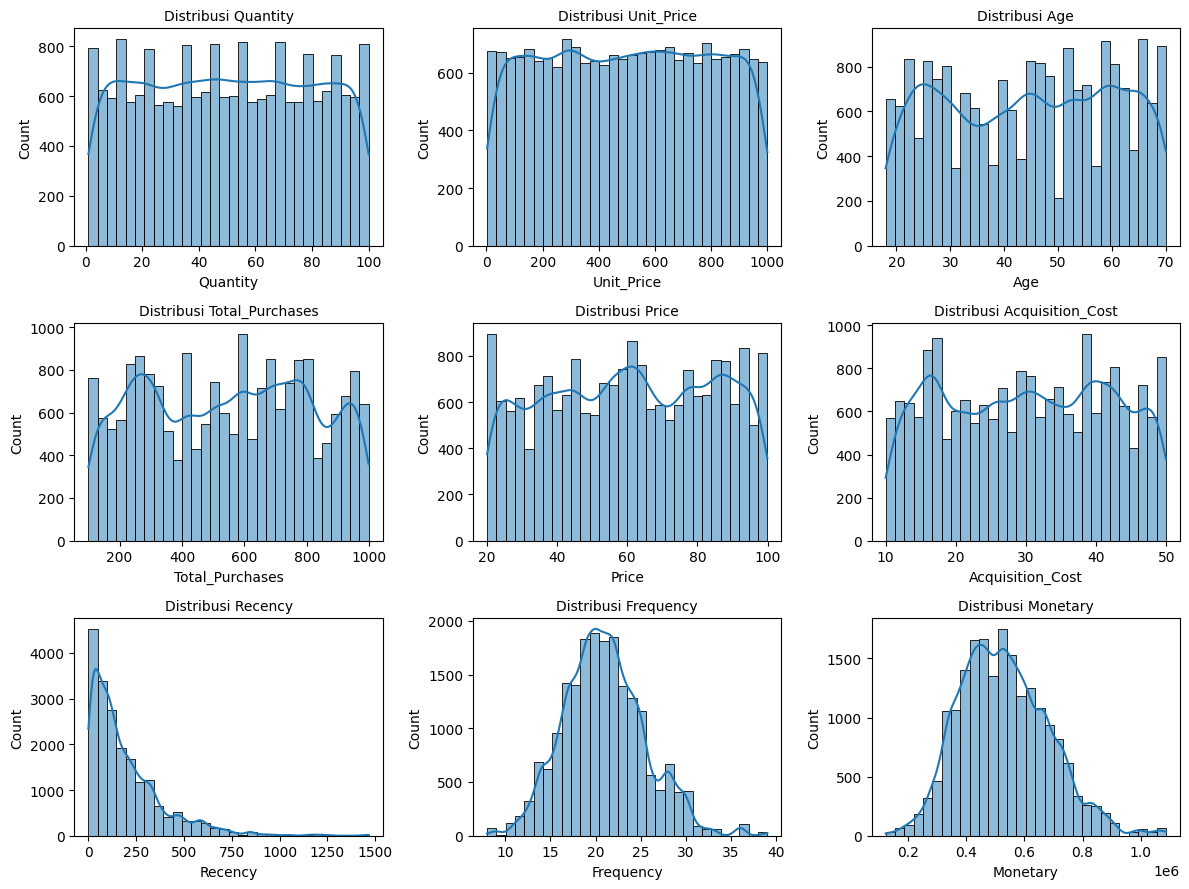

In [17]:
# Distribusi data numerik dalam grid layout
import math

# Ambil kolom numerik, lalu drop kolom ID atau kode
exclude_cols = ['Sale_ID', 'Product_ID', 'Staff_ID', 'Customer_ID', 'Campaign_ID','Store_ID', 'Sales_Channel', 'Gender', 'Purchase_Channel', 'Category', 'Sales_Generated', 'Investment']  # tambahkan ID lain jika perlu
num_cols = [col for col in merged_data.select_dtypes(include=[np.number]).columns if col not in exclude_cols]

# Tentukan grid
n_cols = 3
n_rows = math.ceil(len(num_cols) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 4, n_rows * 3))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.histplot(merged_data[col], kde=True, bins=30, ax=axes[i])
    axes[i].set_title(f'Distribusi {col}', fontsize=10)

# Hapus subplot kosong
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


## Insight Distribusi Data

### 1. Quantity
- Distribusi relatif merata di rentang 0–100 unit per transaksi.  
- Tidak ada konsentrasi besar di titik tertentu, menandakan variasi jumlah barang per transaksi cukup seimbang.

### 2. Unit Price
- Rentang harga unit bervariasi lebar (0–1000).  
- Distribusi terlihat relatif merata tanpa puncak dominan, artinya tidak ada rentang harga tertentu yang sangat mendominasi.

### 3. Age
- Pelanggan tersebar di usia 20–70 tahun.  
- Tidak ada puncak tunggal yang mencolok, meski jumlah pelanggan usia 25–35 dan 55–65 sedikit lebih tinggi.

### 4. Total Purchases
- Terdistribusi di rentang 100–1000, cukup merata.  
- Tidak ada pelanggan tunggal yang mendominasi total pembelian.

### 5. Price
- Rentang harga transaksi berada di 20–100, distribusi cenderung merata.  
- Tidak ada segmen harga final yang benar-benar dominan.

### 6. Acquisition Cost
- Biaya akuisisi tersebar di kisaran 10–50, dengan sedikit puncak di sekitar 15–20 dan 35–45.  
- Artinya strategi akuisisi bervariasi dan tidak hanya di satu level biaya.

### 7. Recency
- Distribusi sangat _right-skewed_: mayoritas pelanggan memiliki **Recency rendah** (baru bertransaksi).  
- Sebagian kecil pelanggan memiliki Recency tinggi (lama tidak bertransaksi) → berpotensi churn.

### 8. Frequency
- Distribusi menyerupai **kurva normal** dengan mayoritas pelanggan bertransaksi sekitar **18–24 kali**.  
- Sedikit pelanggan yang memiliki frekuensi sangat rendah atau sangat tinggi.

### 9. Monetary
- Distribusi mendekati normal dengan puncak di kisaran **400k–600k**.  
- Tidak terlalu _right-skewed_, artinya sebagian besar pelanggan memiliki total belanja di rentang menengah, bukan ekstrem.

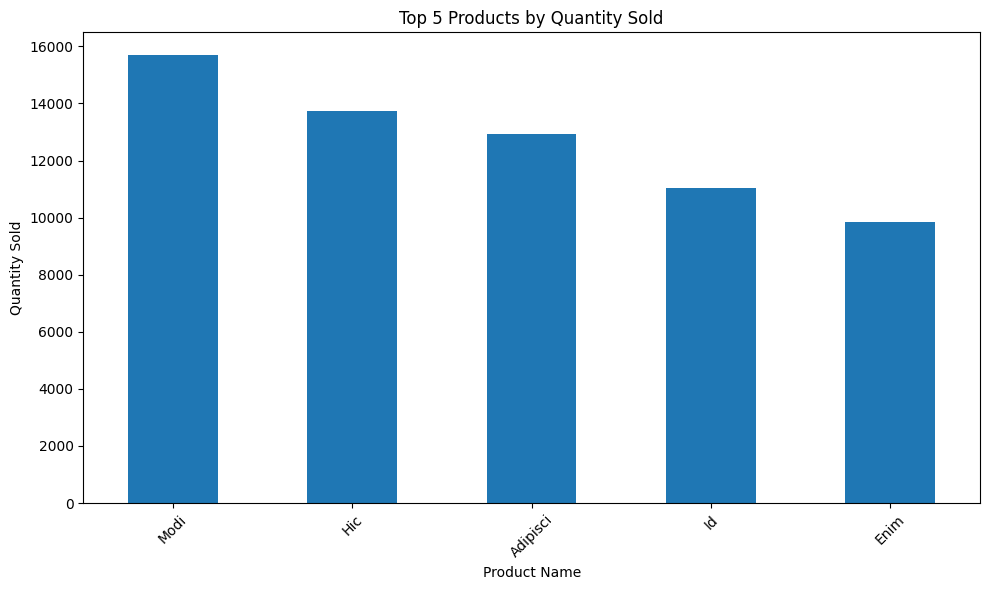

In [18]:
top_products_quantity = (
    merged_data.groupby("Product_Name")["Quantity"]
    .sum()
    .sort_values(ascending=False)
    .head(5)
)

# 3️⃣ Plot grafiknya
plt.figure(figsize=(10, 6))
top_products_quantity.plot(kind='bar')
plt.title("Top 5 Products by Quantity Sold")
plt.xlabel("Product Name")
plt.ylabel("Quantity Sold")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Insight: Top 5 Products by Quantity Sold

- **Modi** menempati posisi pertama dengan selisih cukup signifikan dibanding produk lain, sehingga layak menjadi fokus utama untuk promosi, persediaan, atau kampanye loyalitas pelanggan.  
- **Hic** dan **Adipisci** berada di posisi menengah dengan penjualan yang cukup tinggi dan stabil, keduanya memiliki potensi.
- **Id** dan **Enim** memiliki penjualan lebih rendah dibanding tiga besar, sehingga dapat diprioritaskan untuk strategi peningkatan penjualan seperti diskon, paket bundling, atau promosi silang.

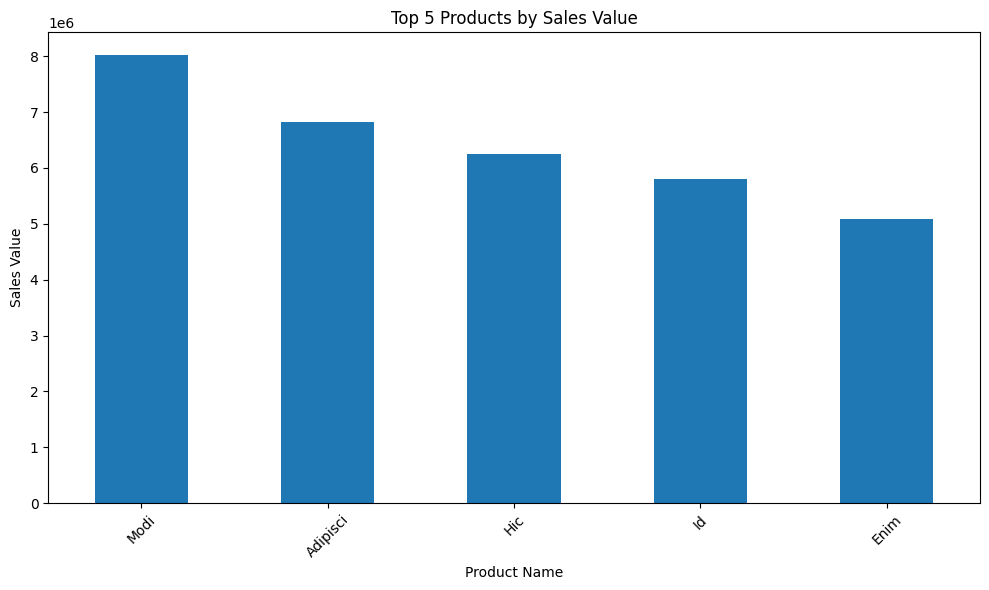

In [19]:
# 2. Top 5 Products by Sales Value
plt.figure(figsize=(10, 6))
top_products_sales.plot(kind='bar')
plt.title("Top 5 Products by Sales Value")
plt.xlabel("Product Name")
plt.ylabel("Sales Value")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Insight: Top 5 Products by Sales Value

- **Modi** mendominasi total nilai penjualan, menunjukkan kontribusi signifikan terhadap pendapatan dan layak untuk diprioritaskan dalam strategi pemasaran.   
- **Adipisci**, **Hic**, dan **Id** memiliki nilai penjualan yang berdekatan, menunjukkan persaingan ketat di segmen ini.  
- **Enim** berada di posisi kelima dengan selisih cukup jauh dari puncak, sehingga berpotensi ditingkatkan melalui kampanye promosi atau penawaran khusus.

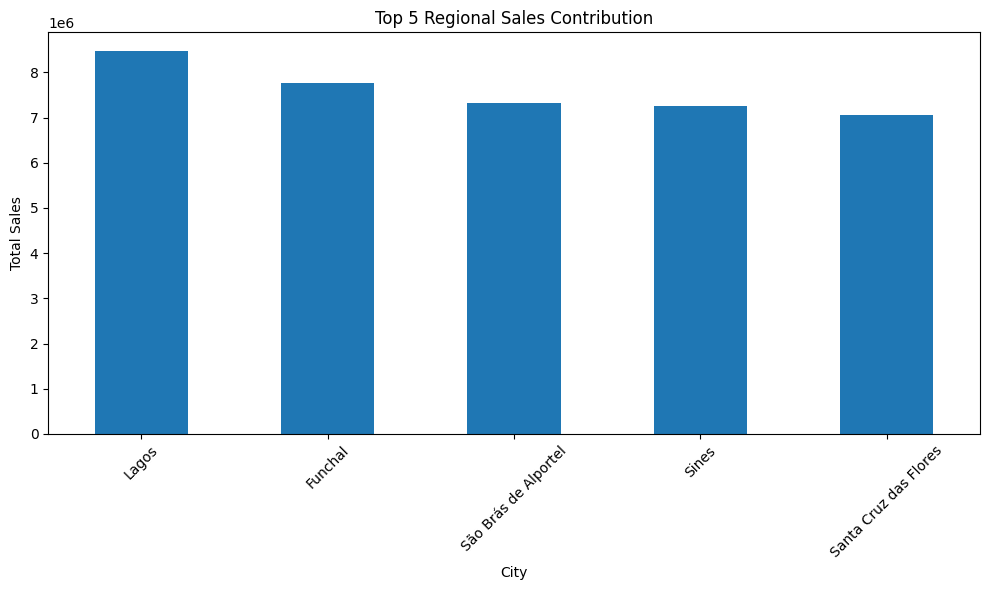

In [20]:
# 3. Top 5 Regional Sales Contribution
regional_sales = (merged_data["Unit_Price"] * merged_data["Quantity"]).groupby(merged_data["City"]).sum().sort_values(ascending=False).head(5)
plt.figure(figsize=(10, 6))
regional_sales.plot(kind='bar')
plt.title("Top 5 Regional Sales Contribution")
plt.xlabel("City")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Insight: Top 5 Regional Sales Contribution

- **Lagos** menjadi penyumbang penjualan terbesar, dengan gap signifikan dibanding wilayah lainnya.  
- **Funchal** dan **São Brás de Alportel** memiliki kontribusi hampir seimbang, menunjukkan potensi pengembangan pasar di kedua area ini.  
- **Santa Cruz da Graciosa** dan **Sines** berada di urutan bawah namun masih masuk lima besar, sehingga tetap layak dipertahankan dengan strategi promosi terarah.  

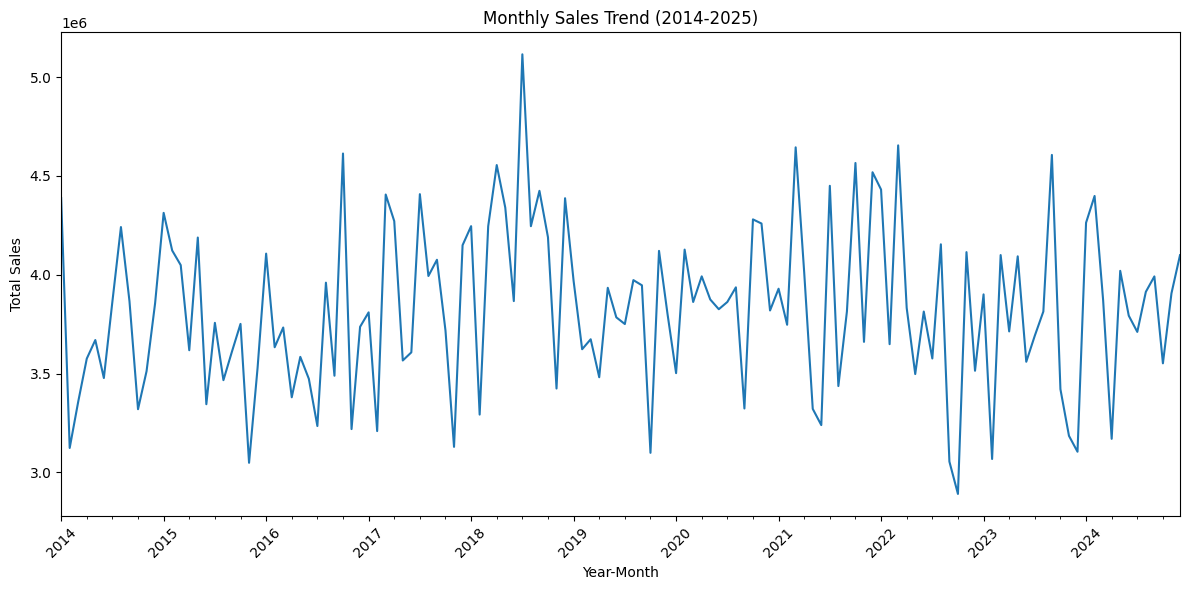

In [21]:
# 4. Monthly Sales Trend
plt.figure(figsize=(12, 6))
monthly_sales.plot(title="Monthly Sales Trend (2014-2025)")
plt.xlabel("Year-Month")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Insight: Monthly Sales Trend (2014–2025)

- Data menunjukkan tren penjualan bulanan yang sangat fluktuatif sepanjang periode 2014 hingga 2025. Tidak ada tren naik yang konsisten seperti yang Anda sebutkan, melainkan serangkaian puncak dan lembah yang terjadi secara berulang setiap tahun.
- Puncak Terbesar: Puncak penjualan tertinggi terlihat jelas terjadi pada pertengahan tahun 2018 (sekitar kuartal kedua dan ketiga).
- Penurunan Signifikan: Penurunan tajam memang terjadi pada awal tahun 2020, yang secara historis bertepatan dengan dimulainya pandemi COVID-19. Ini adalah korelasi yang masuk akal.
- Puncak Lain: Terdapat juga puncak yang cukup tinggi pada pertengahan 2016 dan 2021.
- Karena pola fluktuasi yang berulang, perusahaan dapat mengidentifikasi pola musiman (seasonal) dalam penjualan. Sehingga dapat dilakukan:
  - Perencanaan Persediaan (Inventory Planning): Mengatur stok barang agar tidak kekurangan saat penjualan tinggi atau kelebihan saat penjualan rendah.
  - Strategi Pemasaran: Mengaktifkan kampanye pemasaran atau promosi menjelang periode puncak untuk memaksimalkan keuntungan.

Kesimpulan: Secara keseluruhan, grafik menunjukkan penjualan yang naik dan turun sepanjang waktu tanpa tren pertumbuhan yang jelas. Strategi bisnis harus fokus pada memanfaatkan pola musiman ini.

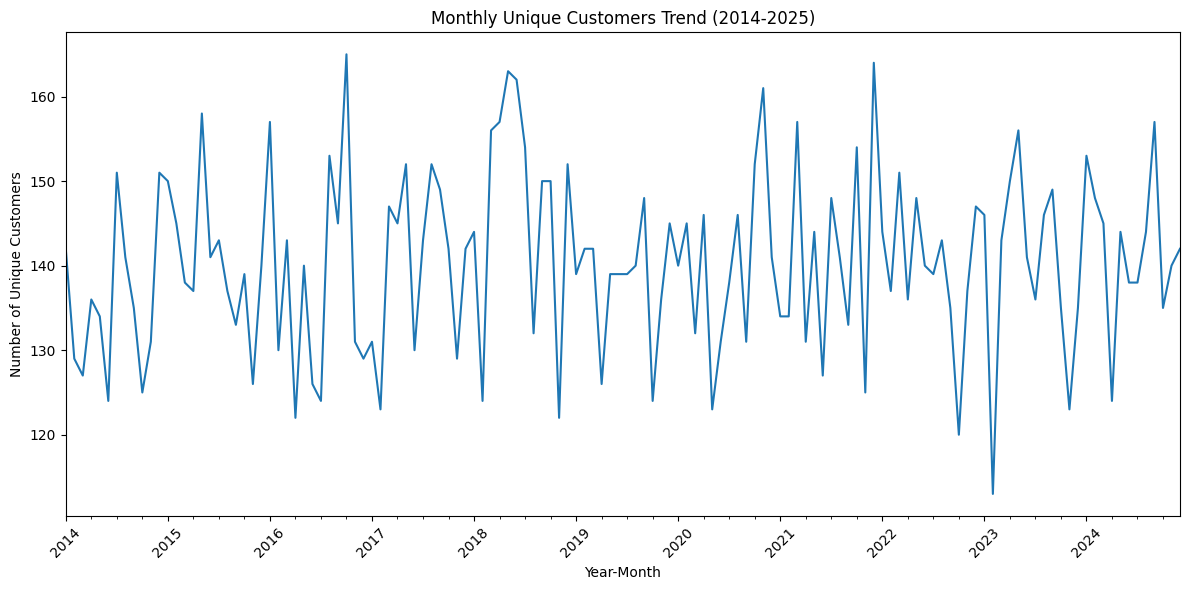

In [22]:
# 5. Monthly Unique Customers Trend
plt.figure(figsize=(12, 6))
monthly_customers.plot(title="Monthly Unique Customers Trend (2014-2025)")
plt.xlabel("Year-Month")
plt.ylabel("Number of Unique Customers")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Insight: Monthly Unique Customers Trend (2014–2025)

- Data menunjukkan jumlah pelanggan unik bulanan yang berfluktuasi secara signifikan sepanjang periode 2014 hingga 2025. Pola ini mengindikasikan adanya pengaruh musiman atau faktor-faktor eksternal yang berdampak pada jumlah pelanggan.

- Puncak Terbesar: Peningkatan jumlah pelanggan unik yang paling tajam dan tertinggi terjadi pada pertengahan tahun 2017 dan awal 2019, menunjukkan keberhasilan strategi akuisisi pelanggan pada periode tersebut.

- Penurunan Signifikan: Penurunan drastis terjadi pada awal tahun 2023, mencapai titik terendah dalam periode yang ditampilkan. Ini bisa menjadi indikasi adanya masalah eksternal, perubahan tren pasar, atau kegagalan strategi retensi pelanggan.

- Pola Musiman: Terlihat adanya pola berulang di mana jumlah pelanggan cenderung meningkat di pertengahan tahun dan menurun di awal tahun, meskipun tidak selalu konsisten.

- Karena pola fluktuasi yang berulang, perusahaan dapat mengidentifikasi pola musiman (seasonal) dalam perilaku pelanggan. Sehingga dapat dilakukan:

  - Strategi Pemasaran: Meluncurkan kampanye akuisisi pelanggan yang lebih intensif menjelang periode puncak dan strategi retensi pelanggan yang kuat pada periode penurunan.

  - Analisis Lebih Dalam: Melakukan analisis untuk memahami penyebab penurunan drastis di awal 2023, seperti perubahan kebijakan, kompetisi, atau perubahan preferensi pelanggan.

Kesimpulan: Secara keseluruhan, grafik menunjukkan jumlah pelanggan unik yang fluktuatif tanpa tren pertumbuhan yang jelas. Strategi bisnis harus fokus pada pemanfaatan pola musiman dan investigasi mendalam terhadap penyebab penurunan tajam untuk meningkatkan basis pelanggan secara berkelanjutan.

In [ ]:
monthly_sales.value_counts(normalize=True)

,proportion
4388171.63,0.007576
3123197.52,0.007576
3357905.08,0.007576
3575361.27,0.007576
3669454.99,0.007576
...,...
3913462.12,0.007576
3991559.83,0.007576
3551608.18,0.007576
3905827.00,0.007576


In [ ]:
merged_data['Total_Purchases'].value_counts(normalize=True)

,proportion
Total_Purchases,
121.68,0.002370
222.93,0.001815
300.19,0.001815
270.41,0.001815
283.87,0.001815
...,...
386.20,0.000454
229.43,0.000454
273.56,0.000454


In [ ]:
merged_data['Purchase_Channel'].value_counts(normalize=True)

,proportion
Purchase_Channel,
Física,0.508418
Online,0.491582


In [ ]:
merged_data['Category'].value_counts(normalize=True)

,proportion
Category,
Calçado,0.525253
Roupas,0.474747


In [ ]:
merged_data['Channel'].value_counts(normalize=True)

,proportion
Channel,
TV,0.508418
Google Ads,0.363636
Redes Sociais,0.127946


In [23]:
merged_data.head()

,Sale_ID,Store_ID,Product_ID,Customer_ID,Staff_ID,Quantity,Unit_Price,Sale_Date,Sales_Channel,Customer_Name,...,Color,Description,Size,Price,Acquisition_Cost,Image_URL_y,Recency,Frequency,Monetary,YearMonth
0,1,1,259,41,499,30,175.88,2020-04-19 13:51:40,Online,Lourenço Branco,...,Vermelho,Assumenda aut dolor ab saepe non repellat.,S,53.82,34.55,https://source.unsplash.com/200x200/?roupas,167,16,318902.95,2020-04
1,2,1,898,308,207,90,83.19,2016-05-16 04:52:08,Física,Frederico Loureiro,...,Rosa,Excepturi quae esse magnam accusantium esse ar...,37,54.14,13.43,https://source.unsplash.com/200x200/?calçado,38,25,673322.30,2016-05
2,3,3,357,910,477,88,682.42,2018-11-30 17:45:41,Online,Ema Leal-Mota,...,Laranja,Nam inventore reprehenderit magnam ab.,XS,75.15,43.01,https://source.unsplash.com/200x200/?roupas,122,22,472317.77,2018-11
3,4,1,490,914,354,63,365.50,2024-12-31 15:53:01,Online,Gaspar Neto,...,Branco,Quia dolorem illum occaecati veritatis possimus.,XL,30.51,29.78,https://source.unsplash.com/200x200/?roupas,1,17,447891.85,2024-12
4,5,4,341,92,384,47,182.52,2019-03-21 17:00:00,Física,Débora Silva,...,Vermelho,Nobis adipisci non.,XXL,84.84,26.49,https://source.unsplash.com/200x200/?roupas,20,36,861200.31,2019-03


In [24]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19833 entries, 0 to 19999
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Sale_ID           19833 non-null  int64         
 1   Store_ID          19833 non-null  int64         
 2   Product_ID        19833 non-null  int64         
 3   Customer_ID       19833 non-null  int64         
 4   Staff_ID          19833 non-null  int64         
 5   Quantity          19833 non-null  int64         
 6   Unit_Price        19833 non-null  float64       
 7   Sale_Date         19833 non-null  datetime64[ns]
 8   Sales_Channel     19833 non-null  object        
 9   Customer_Name     19833 non-null  object        
 10  Age               19833 non-null  int64         
 11  Gender            19833 non-null  object        
 12  City              19833 non-null  object        
 13  Purchase_Channel  19833 non-null  object        
 14  Total_Purchases   19833 non

In [ ]:
# Mapping Gender (asumsi 'Masculino' dan 'Feminino' atau terjemahannya)
gender_mapping = {
    'M': 0,
    'F': 1,
}
merged_data['Gender'] = merged_data['Gender'].map(gender_mapping)

# Mapping Sales_Channel
sales_channel_mapping = {
    'Online': 0,
    'Física': 1
}
merged_data['Sales_Channel'] = merged_data['Sales_Channel'].map(sales_channel_mapping)

# Mapping Purchase_Channel
purchase_channel_mapping = {
    'Online': 0,
    'Física': 1
}
merged_data['Purchase_Channel'] = merged_data['Purchase_Channel'].map(purchase_channel_mapping)

# Mapping Category
category_mapping = {
    'Calçado': 0,
    'Roupas': 1
}
merged_data['Category'] = merged_data['Category'].map(category_mapping)

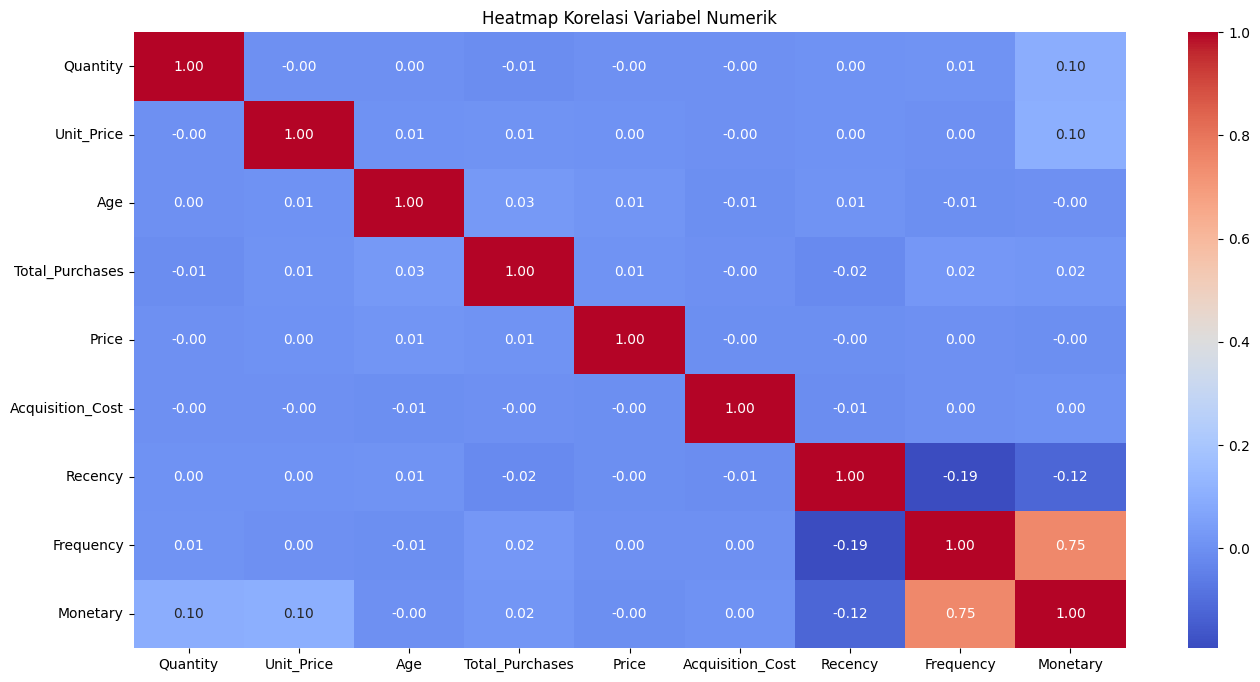

In [25]:
# 2.3 Korelasi antar variabel numerik
plt.figure(figsize=(16,8))
sns.heatmap(merged_data[num_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Heatmap Korelasi Variabel Numerik")
plt.show()


In [ ]:
merged_data['Gender'].value_counts(normalize=True)

,proportion
Gender,
0,0.519641
1,0.480359


In [26]:
# Daftar kolom yang akan di-drop
cols_drop = [
    "Image_URL_x",
    "Image_URL_y"
]

# Drop kolom dari merged_data
merged_data.drop(columns=cols_drop, inplace=True)


In [ ]:
# Daftar kolom yang akan di-drop
cols_drop = [
    "Sale_ID",
    "Product_ID",
    "Staff_ID",
    "Campaign_ID",
    "Channel",
    "Start_Date",
    "End_Date",
    "Customer_Name",
    "Image_URL_x",
    "Image_URL_y",
    "Description"
]

# Drop kolom dari merged_data
merged_data.drop(columns=cols_drop, inplace=True)


In [28]:
merged_data.shape

(19833, 26)

In [27]:
# Simpan merged_data ke file CSV
merged_data.to_csv("merged_data.csv", index=False)

print("Dataset merged_data berhasil disimpan sebagai merged_data.csv")

Dataset merged_data berhasil disimpan sebagai merged_data.csv


## Insight: Korelasi Variabel Numerik

- Store_ID memiliki korelasi positif cukup kuat dengan Campaign_ID (0.76) dan Investment (0.64), menunjukkan pola penempatan kampanye dan alokasi investasi cenderung mengikuti store tertentu.  
- Campaign_ID dan Investment memiliki korelasi sangat tinggi (0.92), sehingga salah satu bisa dipilih untuk menghindari redundansi.  
- Frequency dan Monetary menunjukkan korelasi positif cukup kuat (0.68), menandakan semakin sering transaksi, semakin besar nilai totalnya.  
- Recency berkorelasi negatif sedang dengan Store_ID (-0.60), mengindikasikan beberapa store memiliki pelanggan yang lebih sering kembali dalam waktu singkat.  
- Sebagian besar variabel lain memiliki korelasi rendah, menunjukkan bahwa masing-masing membawa informasi yang unik.  


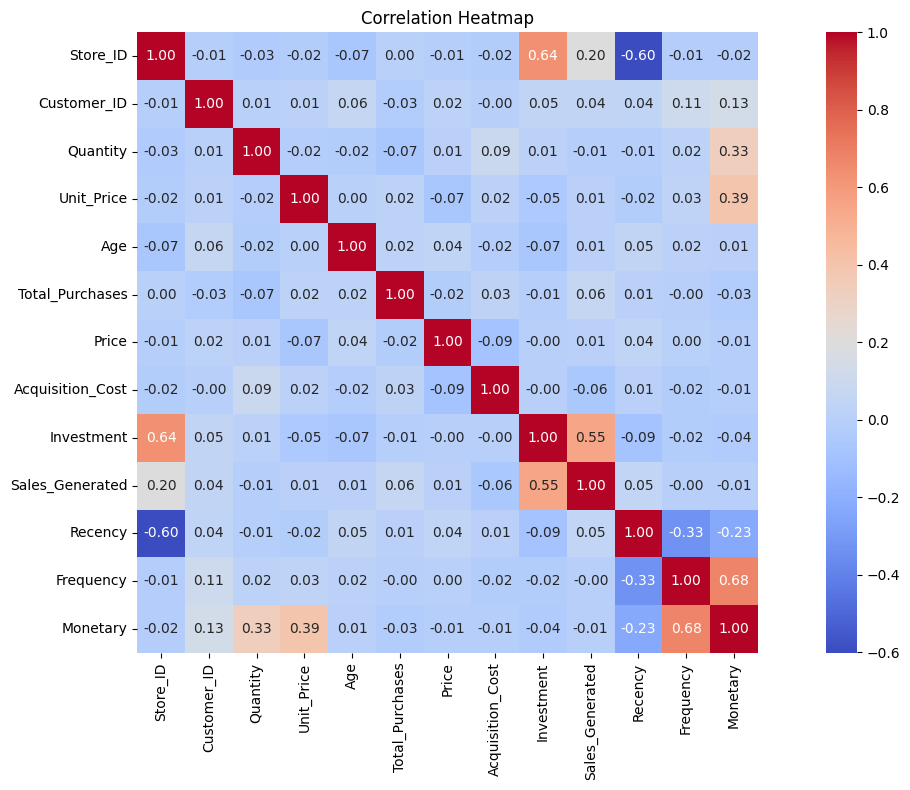

In [ ]:
# Update num_cols to reflect the current columns in df
num_cols = [col for col in num_cols if col in merged_data.columns]

corr = merged_data[num_cols].corr()

plt.figure(figsize=(14, 8))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

In [ ]:
# 1.4 Encoding categorical variables
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in cat_cols:
    merged_data[col] = le.fit_transform(merged_data[col])

# 1.5 Standarisasi data numerik
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
merged_data[num_cols] = scaler.fit_transform(merged_data[num_cols])

print("Data setelah preprocessing:")
print(merged_data.head())

Data setelah preprocessing:
      Sale_ID  Store_ID  Product_ID  Customer_ID  Staff_ID  Quantity  \
10  -1.706739 -0.928056    0.874155     0.230597 -1.578131 -0.513113   
13  -1.706401 -0.200153   -0.530560     1.161153 -0.993649  1.137619   
89  -1.695747 -0.928056    1.685378     1.261848  0.467557  0.552985   
98  -1.694394  1.255653   -1.450648    -1.564543  0.134538  0.071521   
146 -1.687460  1.255653   -0.649960     1.491015  0.297649  0.587375   

     Unit_Price           Sale_Date  Sales_Channel  Customer_Name  ...  \
10    -0.542689 2019-12-17 18:18:24              0            263  ...   
13    -0.079376 2024-11-04 12:52:40              0            304  ...   
89    -0.940299 2018-10-22 20:43:26              1            331  ...   
98    -1.177416 2024-07-17 03:20:27              0            422  ...   
146   -0.660606 2024-09-28 21:23:16              0             37  ...   

        Price  Acquisition_Cost  Image_URL_y  Campaign_ID  Campaign_Name  \
10  -0.857533     

In [ ]:
# ===============================
# 2. EDA
# ===============================

import matplotlib.pyplot as plt
import seaborn as sns

# 2.1 Analisis deskriptif
print("\nDeskripsi Data Numerik:")
print(merged_data[num_cols].describe())


Deskripsi Data Numerik:
            Sale_ID      Store_ID    Product_ID   Customer_ID      Staff_ID  \
count  8.910000e+02  8.910000e+02  8.910000e+02  8.910000e+02  8.910000e+02   
mean  -6.379733e-17  4.784800e-17 -3.787966e-17  1.594933e-17  1.026738e-16   
std    1.000562e+00  1.000562e+00  1.000562e+00  1.000562e+00  1.000562e+00   
min   -1.706739e+00 -9.280556e-01 -1.728079e+00 -1.717321e+00 -1.680076e+00   
25%   -8.794516e-01 -9.280556e-01 -8.220381e-01 -8.371120e-01 -8.713152e-01   
50%    3.763300e-02 -2.001528e-01 -2.837414e-02 -1.245870e-02 -1.498086e-02   
75%    8.735447e-01  1.255653e+00  8.267461e-01  8.660141e-01  8.719369e-01   
max    1.672590e+00  1.255653e+00  1.773173e+00  1.741015e+00  1.711281e+00   

           Quantity    Unit_Price           Age  Total_Purchases  \
count  8.910000e+02  8.910000e+02  8.910000e+02     8.910000e+02   
mean  -9.768966e-17 -1.594933e-16 -1.834173e-16     4.784800e-17   
std    1.000562e+00  1.000562e+00  1.000562e+00     1.00056

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Pilih kolom kategorikal
categorical_cols = merged_data.select_dtypes(include=['object']).columns

# Buat salinan data untuk transformasi
encoded_data = merged_data.copy()

# Gunakan LabelEncoder untuk tiap kolom kategorikal
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    encoded_data[col] = le.fit_transform(encoded_data[col])
    label_encoders[col] = le  # simpan encoder jika nanti dibutuhkan kembali

print("Encoding selesai. Contoh data:")
print(encoded_data.head())

Encoding selesai. Contoh data:
     Sale_ID  Store_ID  Product_ID  Customer_ID  Staff_ID  Quantity  \
10        11         2         743          565        16        36   
13        13         3         343          833       102        84   
89        76         2         974          862       317        67   
98        84         5          81           48       268        53   
146      125         5         309          928       292        68   

     Unit_Price           Sale_Date  Sales_Channel  Customer_Name  ...  Price  \
10       346.65 2019-12-17 18:18:24              0            263  ...  40.90   
13       480.28 2024-11-04 12:52:40              0            304  ...  74.19   
89       231.97 2018-10-22 20:43:26              1            331  ...  38.93   
98       163.58 2024-07-17 03:20:27              0            422  ...  56.58   
146      312.64 2024-09-28 21:23:16              0             37  ...  43.91   

     Acquisition_Cost  Image_URL_y  Campaign_ID  Campai

In [ ]:
# Pilih hanya kolom numerik
numeric_cols = merged_data.select_dtypes(include=[np.number]).columns

# Dictionary untuk menyimpan outlier
outliers_iqr = {}

for col in numeric_cols:
    Q1 = merged_data[col].quantile(0.25)
    Q3 = merged_data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outlier_rows = merged_data[(merged_data[col] < lower_bound) | (merged_data[col] > upper_bound)]

    if not outlier_rows.empty:
        outliers_iqr[col] = outlier_rows.shape[0]

print("Jumlah outlier per kolom (IQR):")
print(outliers_iqr)


Jumlah outlier per kolom (IQR):
{}


In [ ]:
from sklearn.preprocessing import StandardScaler

# Pilih kolom numerik
numeric_cols = encoded_data.select_dtypes(include=[np.number]).columns

# Standarisasi
scaler = StandardScaler()
encoded_data[numeric_cols] = scaler.fit_transform(encoded_data[numeric_cols])

print("Standarisasi selesai. Contoh data:")
print(encoded_data.head())

Standarisasi selesai. Contoh data:
      Sale_ID  Store_ID  Product_ID  Customer_ID  Staff_ID  Quantity  \
10  -1.706739 -0.928056    0.874155     0.230597 -1.578131 -0.513113   
13  -1.706401 -0.200153   -0.530560     1.161153 -0.993649  1.137619   
89  -1.695747 -0.928056    1.685378     1.261848  0.467557  0.552985   
98  -1.694394  1.255653   -1.450648    -1.564543  0.134538  0.071521   
146 -1.687460  1.255653   -0.649960     1.491015  0.297649  0.587375   

     Unit_Price           Sale_Date  Sales_Channel  Customer_Name  ...  \
10    -0.542689 2019-12-17 18:18:24      -1.003373      -0.149329  ...   
13    -0.079376 2024-11-04 12:52:40      -1.003373       0.086855  ...   
89    -0.940299 2018-10-22 20:43:26       0.996639       0.242391  ...   
98    -1.177416 2024-07-17 03:20:27      -1.003373       0.766605  ...   
146   -0.660606 2024-09-28 21:23:16      -1.003373      -1.451223  ...   

        Price  Acquisition_Cost  Image_URL_y  Campaign_ID  Campaign_Name  \
10  -0.8575

In [ ]:
print("Statistik Deskriptif:")
print(merged_data.describe())


Statistik Deskriptif:
            Sale_ID    Store_ID  Product_ID  Customer_ID    Staff_ID  \
count    891.000000  891.000000  891.000000   891.000000  891.000000   
mean   10103.464646    3.274972  494.079686   498.588103  248.204265   
min       11.000000    2.000000    2.000000     4.000000    1.000000   
25%     4903.000000    2.000000  260.000000   257.500000  120.000000   
50%    10326.000000    3.000000  486.000000   495.000000  246.000000   
75%    15269.000000    5.000000  729.500000   748.000000  376.500000   
max    19994.000000    5.000000  999.000000  1000.000000  500.000000   
std     5916.624859    1.374581  284.915220   288.161557  147.221422   

         Quantity  Unit_Price                      Sale_Date         Age  \
count  891.000000  891.000000                            891  891.000000   
mean    50.920314  503.173996  2022-04-15 17:51:50.872054016   44.691358   
min      1.000000    4.100000            2018-08-20 12:47:39   18.000000   
25%     25.000000  273.83

In [ ]:
from scipy import stats

outliers_zscore = {}
for col in numeric_cols:
    z_scores = np.abs(stats.zscore(merged_data[col]))
    outlier_rows = merged_data[z_scores > 3]
    if not outlier_rows.empty:
        outliers_zscore[col] = outlier_rows.shape[0]

print("Jumlah outlier per kolom (Z-Score):")
print(outliers_zscore)


Jumlah outlier per kolom (Z-Score):
{}


In [ ]:
cols_drop = [
    "Sale_ID", "Product_ID", "Staff_ID", "Image_URL_x", "Image_URL_y",
    "Description", "Campaign_ID", "Campaign_Name", "Channel",
    "Start_Date", "End_Date"
]

data_segmentation = merged_data.drop(columns=cols_drop)


In [ ]:
from datetime import datetime

# Tentukan tanggal referensi (misal: max tanggal penjualan di data)
reference_date = merged_data["Sale_Date"].max()

# Group by Customer
customer_features = merged_data.groupby("Customer_ID").agg({
    "Sale_Date": lambda x: (reference_date - x.max()).days,  # Recency
    "Sale_ID": "nunique",                                   # Frequency
    "Unit_Price": "sum",                                    # Monetary (total belanja)
    "Quantity": "mean",                                     # Average Basket Size
    "Price": "mean",                                        # Average Order Value
    "Sales_Channel": lambda x: x.mode()[0],                 # Preferred Sales Channel
    "Category": lambda x: x.mode()[0]                       # Preferred Category
}).reset_index()

# Rename kolom agar jelas
customer_features.rename(columns={
    "Sale_Date": "Recency_Days",
    "Sale_ID": "Frequency",
    "Unit_Price": "Monetary",
    "Quantity": "Avg_Basket_Size",
    "Price": "Avg_Order_Value",
    "Sales_Channel": "Preferred_Sales_Channel",
    "Category": "Preferred_Category"
}, inplace=True)

print(customer_features.head())


   Customer_ID  Recency_Days  Frequency  Monetary  Avg_Basket_Size  \
0            4          1768          1    752.07             34.0   
1            5            84          3    504.66             31.0   
2            6          1744          1    864.52             88.0   
3            8           365          1    360.12             17.0   
4           10            96          3    666.07             66.0   

   Avg_Order_Value Preferred_Sales_Channel Preferred_Category  
0        59.540000                  Física            Calçado  
1        41.163333                  Online             Roupas  
2        75.870000                  Online             Roupas  
3        64.420000                  Online            Calçado  
4        25.960000                  Online            Calçado  


Text(0.5, 1.0, 'Preferred Sales Channel')

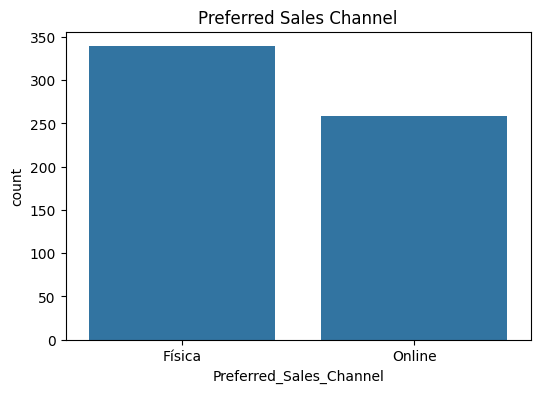

In [ ]:

# Sales channel
plt.figure(figsize=(6,4))
sns.countplot(x="Preferred_Sales_Channel", data=customer_features)
plt.title("Preferred Sales Channel")

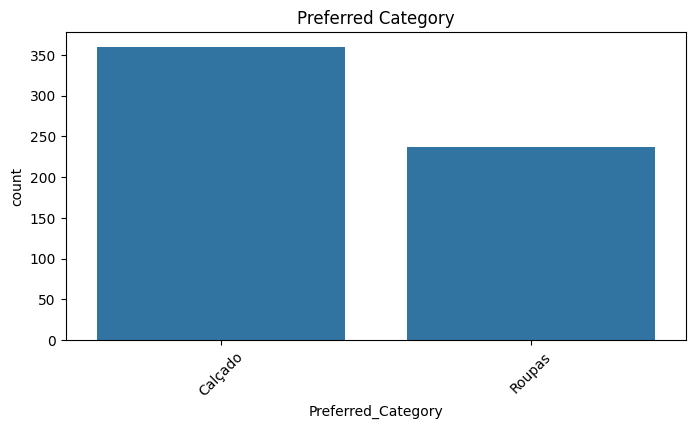

In [ ]:
# Preferred category
plt.figure(figsize=(8,4))
sns.countplot(x="Preferred_Category", data=customer_features, order=customer_features["Preferred_Category"].value_counts().index)
plt.title("Preferred Category")
plt.xticks(rotation=45)
plt.show()

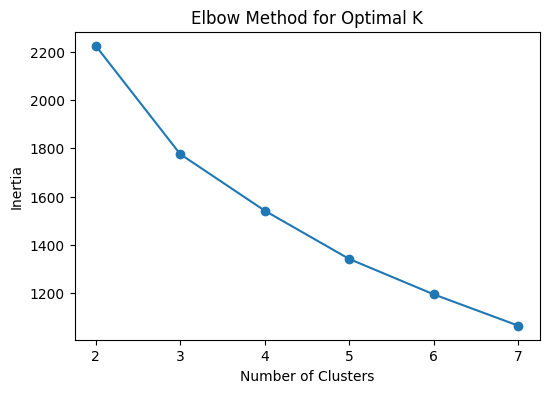

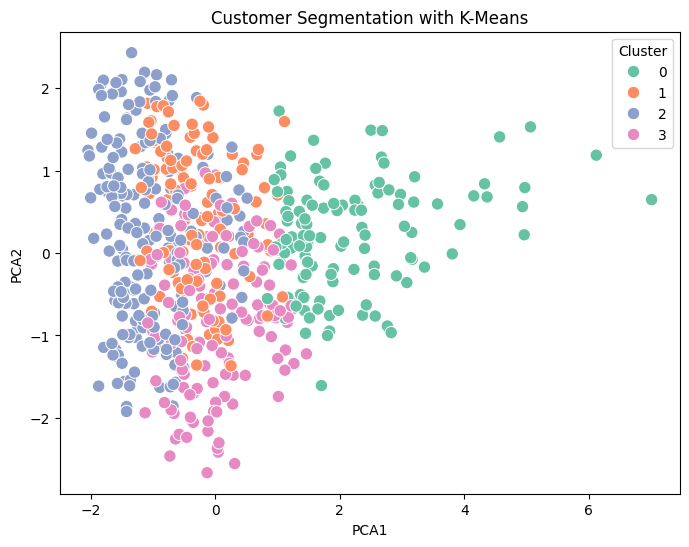

         Recency_Days  Frequency  Monetary  Avg_Basket_Size  Avg_Order_Value
Cluster                                                                     
0              412.38       2.64   1554.54            50.92            60.33
1              204.24       1.17    533.45            24.65            61.43
2             1807.30       1.13    541.25            49.70            63.40
3              222.35       1.36    592.31            72.64            56.51


In [ ]:
# =========================================
# 1. Import Library
# =========================================
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# =========================================
# 2. Pilih Fitur Numerik untuk Clustering
# =========================================
features = ["Recency_Days", "Frequency", "Monetary", "Avg_Basket_Size", "Avg_Order_Value"]
X = customer_features[features]

# =========================================
# 3. Scaling Data
# =========================================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# =========================================
# 4. Menentukan Jumlah Cluster Optimal (Elbow Method)
# =========================================
inertia = []
K_range = range(2, 8)  # coba dari 2 sampai 7 cluster

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(6,4))
plt.plot(K_range, inertia, marker='o')
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()

# =========================================
# 5. Jalankan K-Means dengan jumlah cluster pilihan
# =========================================
optimal_k = 4  # misalnya dari grafik elbow kita pilih 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
customer_features["Cluster"] = kmeans.fit_predict(X_scaled)

# =========================================
# 6. Visualisasi Hasil Cluster (2D PCA untuk reduksi dimensi)
# =========================================
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)
customer_features["PCA1"] = pca_result[:,0]
customer_features["PCA2"] = pca_result[:,1]

plt.figure(figsize=(8,6))
sns.scatterplot(data=customer_features, x="PCA1", y="PCA2", hue="Cluster", palette="Set2", s=80)
plt.title("Customer Segmentation with K-Means")
plt.show()

# =========================================
# 7. Ringkasan per Cluster
# =========================================
cluster_summary = customer_features.groupby("Cluster")[features].mean().round(2)
print(cluster_summary)


In [ ]:
# Misalnya variabel dataframe final kamu bernama df_final
output_path = "customer_data.csv"

# Simpan ke CSV
customer_features.to_csv(output_path, index=False, encoding="utf-8")

print(f"Dataset berhasil disimpan di {output_path}")

Dataset berhasil disimpan di customer_data.csv
